In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/Users/namchangseok/Desktop/코드스테이츠/AI_12기/cp2/split_data.csv')
df=pd.read_csv('/Users/namchangseok/Desktop/코드스테이츠/AI_12기/cp2/split_data.csv')

In [3]:
data= data.dropna()
data.dtypes

Unnamed: 0         int64
event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [4]:
print('데이터 개수' ,data.shape, '\nID 개수', data['user_id'].nunique(),'\n구매 데이터의 개수',(data['event_type']=='purchase').sum())

데이터 개수 (1328183, 10) 
ID 개수 684982 
구매 데이터의 개수 27859


In [127]:
data=data.drop(['Unnamed: 0'],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
data

In [6]:
# purchase를 한 데이터만 뽑아보자.
data.loc[data['event_type']=='purchase']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
172,2019-10-18 10:49:20 UTC,purchase,1700718,2053013553031414015,computers.peripherals.monitor,acer,89.84,523013344,954a50eb-125a-47f9-93f9-7ca609a4bda3
352,2019-10-03 06:32:31 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,132.31,514696726,5a881108-0b8f-4a29-b9ff-a7b649e1fa6d
362,2019-10-31 10:59:05 UTC,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,109.00,521699061,9b32d517-e18e-45bd-be35-0e6d4c75dbbe
592,2019-10-19 16:07:13 UTC,purchase,1801690,2053013554415534427,electronics.video.tv,samsung,369.37,513022404,3b80fe86-516d-451f-8dd6-4a5f6f777fb7
680,2019-10-02 13:00:25 UTC,purchase,21404275,2053013561579406073,electronics.clocks,casio,15.19,556002836,f26f00a2-6760-47b6-b9bd-3546d6f80750
...,...,...,...,...,...,...,...,...,...
2122103,2019-10-17 09:44:27 UTC,purchase,1004258,2053013555631882655,electronics.smartphone,apple,756.65,517548594,c7e49d65-4352-4556-beba-252a3524f0ee
2122138,2019-10-23 18:35:51 UTC,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.47,515161163,d132e3eb-cc36-4dae-8adf-1cab98df4012
2122180,2019-10-05 09:55:44 UTC,purchase,6000094,2053013560807654091,auto.accessories.alarm,starline,121.24,555514716,b2329369-c6e7-4e96-b23d-e39d1395d470
2122310,2019-10-11 12:42:58 UTC,purchase,5100564,2053013553341792533,electronics.clocks,samsung,259.95,558853576,3c2eaf0d-704b-4587-a16f-572fa1a9f704


In [7]:
# 시간 관련된 코딩

from datetime import datetime, timedelta, timezone

#문자열 → 시간
data['event_time']=pd.to_datetime(data['event_time'])

#시간대 설정
timezone_dubai = timezone(timedelta(hours=4))
data['event_time'] = data['event_time'].apply(lambda x : x.astimezone(timezone_dubai))

In [8]:
data['event_time']=data['event_time'].apply(lambda x : x.day)

In [9]:
#data=data.sort_values(by=['event_time'],ascending=True)

In [11]:
only_purchases = data.loc[data.event_type == 'purchase']

<function matplotlib.pyplot.show(close=None, block=None)>

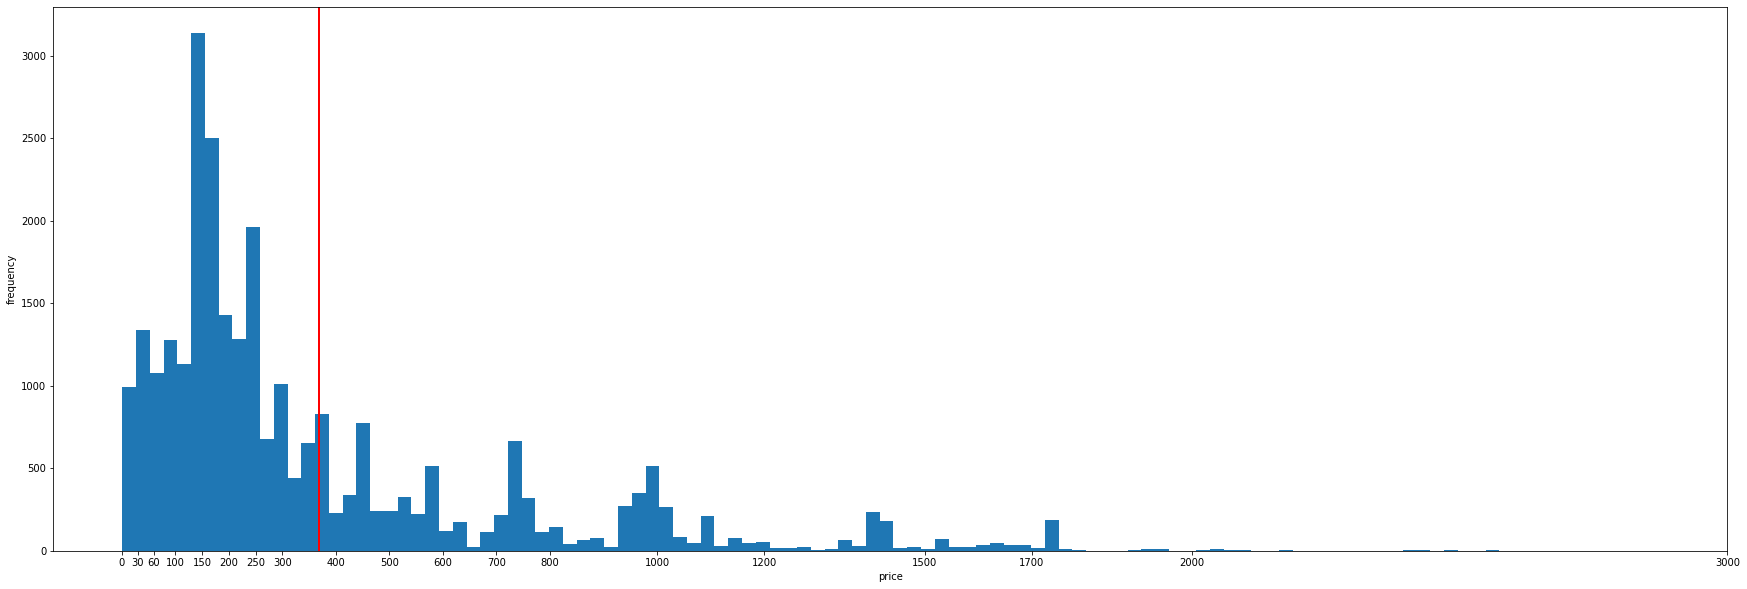

In [12]:
# 팔린 물건들의 가격들의 분포를 파악해보자.
price=only_purchases['price']

plt.figure(figsize=(30,10))
plt.hist(price, bins=100)
plt.xlabel('price')
'''
x_value=[0,100,150,200,250,300,500,1000,2000]
y_value=[0,10000,20000,30000,40000,50000,60000,70000,80000]
plt.plot(x_value,y_value)
'''

plt.xticks([0,30,60,100,150,200,250,300,400,500,600,700,800,1000,1200,1500,1700,2000,3000])
plt.ylabel('frequency')
plt.axvline(x = price.mean(), linewidth = 2, color = 'r')

plt.show


In [92]:
#가격별 구매율을 구해보자. 
'''
위의 표가 가격대별 구매율이니까 view도 구해서 퍼센트로 어떻게 하면 되지 않을까


전체 데이터에서 view가 보는 가격대. purchase를 한 가격대. 
'''

view_purchase = data.loc[data.event_type == 'view']
only_view

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_split,main_category,middle_category
0,12,view,21407109,2053013561579406073,electronics.clocks,tissot,226.52,512636824,f45930d0-1807-40a9-815b-e2901d88e87e,"[electronics, clocks]",electronics,clocks
1,11,view,1005169,2053013555631882655,electronics.smartphone,samsung,228.71,554770926,baa8b4b4-74f9-4ed8-a1a4-f9e9ff322a3a,"[electronics, smartphone]",electronics,smartphone
2,16,view,8800048,2053013555573162395,electronics.telephone,nokia,22.19,517857376,84cce548-1021-4286-9a8d-86638d664199,"[electronics, telephone]",electronics,telephone
5,17,view,1004227,2053013555631882655,electronics.smartphone,apple,1003.84,513862246,2cf79802-71df-483b-9d9c-96dd8939957c,"[electronics, smartphone]",electronics,smartphone
6,8,view,4700671,2053013560899928785,auto.accessories.videoregister,xiaomi,48.39,514762265,984d40e4-578e-4459-9f6b-949103f6c628,"[auto, accessories, videoregister]",auto,accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
2122428,7,view,17800028,2053013559868129947,computers.desktop,dxracer,282.09,543808582,296afd2b-40c0-445c-b478-8d640faf629b,"[computers, desktop]",computers,desktop
2122430,26,view,21407594,2053013561579406073,electronics.clocks,certina,278.00,517470882,b2957414-de14-44fb-b5c0-c3609b0e7ede,"[electronics, clocks]",electronics,clocks
2122431,1,view,1005104,2053013555631882655,electronics.smartphone,apple,975.57,555634406,41d6bf67-a286-4fc5-a2f0-cb682f2d5427,"[electronics, smartphone]",electronics,smartphone
2122432,12,view,1005105,2053013555631882655,electronics.smartphone,apple,1428.31,559365096,f08ae716-1262-409d-9c9f-31ce0ad1821c,"[electronics, smartphone]",electronics,smartphone


In [13]:
#날짜는 조정했으니 이제 어떻게 해야할까? 날짜별 방문자 수와 구매수를 구해보자! 

#plt로 가능할거같다 날자별 view와 purchase를 라인 그래프로 그려보자 

days1=data.loc[data['event_time']==1]


In [14]:
df=data.groupby(['event_time','event_type'],as_index=False).size()


In [15]:
cart=df[df['event_type']=='cart']['size'].tolist()
view=df[df['event_type']=='view']['size'].tolist()
purchase=df[df['event_type']=='purchase']['size'].tolist()

In [16]:
df_chart=pd.DataFrame({'cart':cart,'purchase':purchase,'view':view})
df_chart.index=df_chart.index+1

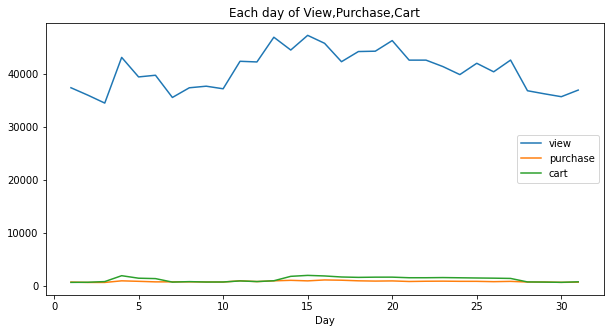

In [17]:


fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()

ax.plot(df_chart.index,df_chart['view'],label='view')
ax.plot(df_chart.index,df_chart['purchase'],label='purchase')
ax.plot(df_chart.index,df_chart['cart'],label='cart')

plt.title('Each day of View,Purchase,Cart')
plt.xlabel('Day')
plt.legend(loc='best', ncol=1) 

각 날짜별 view purchase cart의 숫자


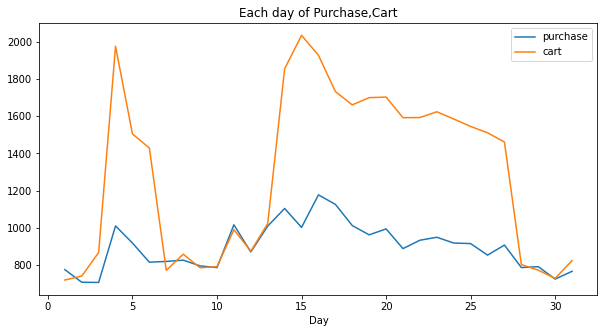

In [18]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()


ax.plot(df_chart.index,df_chart['purchase'],label='purchase')
ax.plot(df_chart.index,df_chart['cart'],label='cart')

plt.title('Each day of Purchase,Cart')
plt.xlabel('Day')
plt.legend(loc='best', ncol=1) 

장바구니에 넣은 상품과 구매한 상품의 추세선이다. 어느정도 연관이 있어 보이긴 하지만 상세한 모델을 파악해봐야 할 것 같다

In [19]:
import plotly.express as ex

lines = ex.line(df_chart,x=df_chart.index,y=['cart','purchase','view'])

In [20]:
lines

In [21]:
# 방문주기가 많은걸 어덯게 표현해야할까 id랑 세션? 한아이디에 세션을 그룹화하면 아이디당 방문을 알수 있지 않을까
# 아이디당 view에 따른 판매량? 
# 유저마다 여러 세션이 있을텐데 

#df=data.groupby(['event_time','event_type'],as_index=False).size()

df1=data

In [22]:
visitor=df1['user_id'].nunique()
visitor

684982

In [23]:
d=df1.loc[:,['event_time','user_id']]

In [24]:
vister_by_date=d.groupby(['event_time'])['user_id'].size()

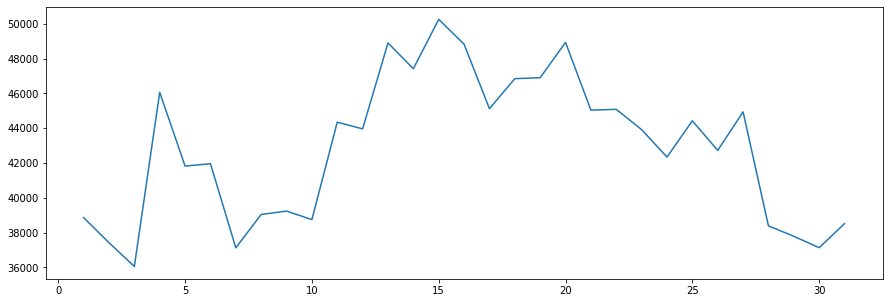

In [25]:
# 하루 방문자수를 표현해보았다. 
plt.rcParams['figure.figsize'] = (15,5)

plt.plot(vister_by_date)
plt.show()

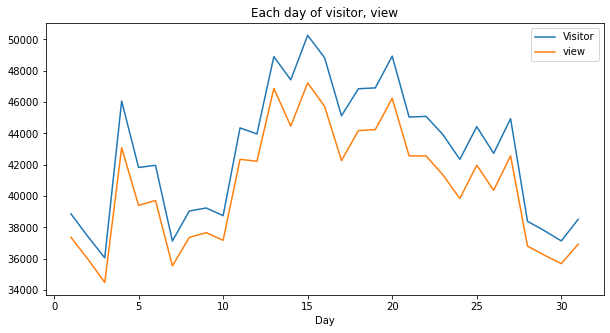

In [26]:
#방문 주기가 더 많을수록 더 많은 상품을 살까?

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()

ax.plot(vister_by_date,label='Visitor')
ax.plot(df_chart.index,df_chart['view'],label='view')


plt.title('Each day of visitor, view')
plt.xlabel('Day')
plt.legend(loc='best', ncol=1) 

방문자 수와 view수는 큰 차이를 보이지 않아보인다. 그러니 view의 숫자로 구매율을 파악하거나 방문자수로 구매율을 예측해도 큰 문제가 되 보이지 않는다.

또하나 발견한건 vistor와 view수가 거의 비슷한 날에는 cart에 물건이 늘어가는 양도 증가한다는 점이다. 왜 그럴까?

In [27]:
#카테고리 나누기
data['category_code_split']=data['category_code'].apply(lambda x : x.split('.'))

In [28]:
brand_purchased= only_purchases.loc[only_purchases.brand.notnull()]

In [29]:
brand_purchased

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
172,18,purchase,1700718,2053013553031414015,computers.peripherals.monitor,acer,89.84,523013344,954a50eb-125a-47f9-93f9-7ca609a4bda3
352,3,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,132.31,514696726,5a881108-0b8f-4a29-b9ff-a7b649e1fa6d
362,31,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,109.00,521699061,9b32d517-e18e-45bd-be35-0e6d4c75dbbe
592,19,purchase,1801690,2053013554415534427,electronics.video.tv,samsung,369.37,513022404,3b80fe86-516d-451f-8dd6-4a5f6f777fb7
680,2,purchase,21404275,2053013561579406073,electronics.clocks,casio,15.19,556002836,f26f00a2-6760-47b6-b9bd-3546d6f80750
...,...,...,...,...,...,...,...,...,...
2122103,17,purchase,1004258,2053013555631882655,electronics.smartphone,apple,756.65,517548594,c7e49d65-4352-4556-beba-252a3524f0ee
2122138,23,purchase,1005204,2053013555631882655,electronics.smartphone,xiaomi,156.47,515161163,d132e3eb-cc36-4dae-8adf-1cab98df4012
2122180,5,purchase,6000094,2053013560807654091,auto.accessories.alarm,starline,121.24,555514716,b2329369-c6e7-4e96-b23d-e39d1395d470
2122310,11,purchase,5100564,2053013553341792533,electronics.clocks,samsung,259.95,558853576,3c2eaf0d-704b-4587-a16f-572fa1a9f704


In [30]:
#agg는 
top_seller=brand_purchased.groupby('brand').brand.agg([len]).sort_values(by='len',ascending=False)
top_seller.head(10)

,len
brand,
samsung,8654
apple,7163
xiaomi,2384
huawei,1172
oppo,543
lg,419
acer,356
elenberg,295
indesit,293


In [31]:
data.loc[data['brand']=='samsung'].count()

event_time             258511
event_type             258511
product_id             258511
category_id            258511
category_code          258511
brand                  258511
price                  258511
user_id                258511
user_session           258511
category_code_split    258511
dtype: int64

In [32]:
d=df.loc[:,['event_time','user_id']]
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])

KeyError: "['user_id'] not in index"

In [ ]:
# 날짜별 방문하는 숫자.
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)
visitor_by_date

,count
event_time,
2019-10-01,43370
2019-10-02,41529
2019-10-03,38891
2019-10-04,48939
2019-10-05,45597
2019-10-06,45323
2019-10-07,42177
2019-10-08,48896
2019-10-09,47446


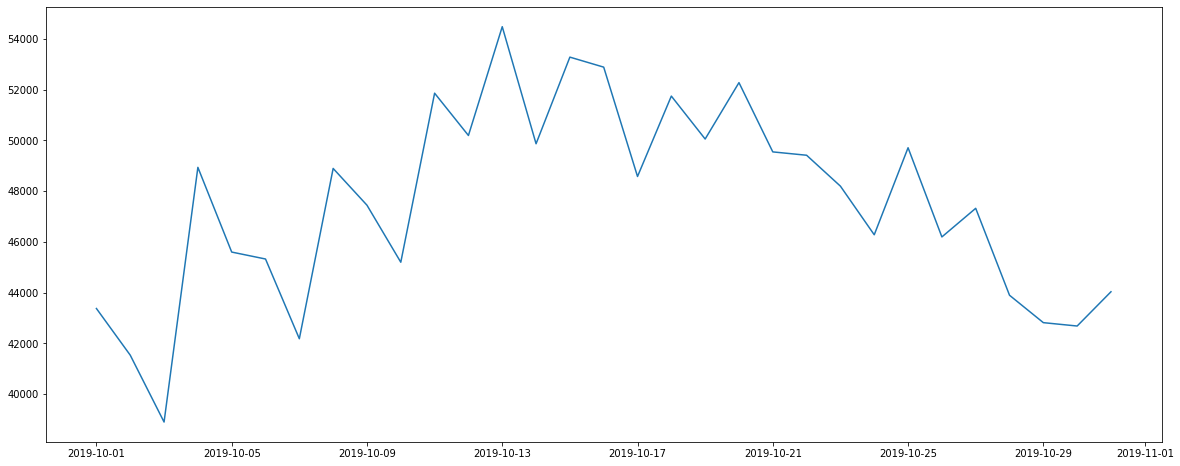

In [ ]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

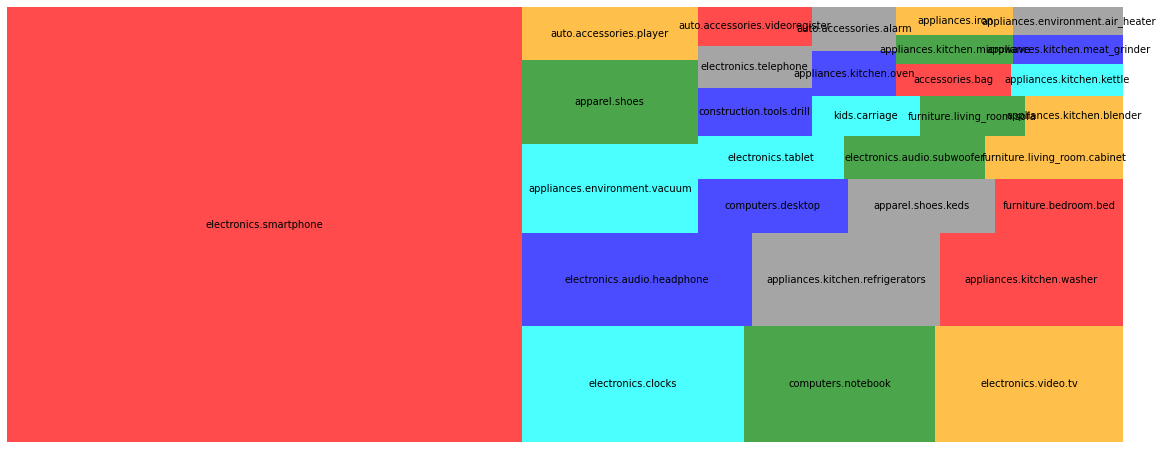

In [ ]:
top_category_n = 30
top_category = df.loc[:,'category_code'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

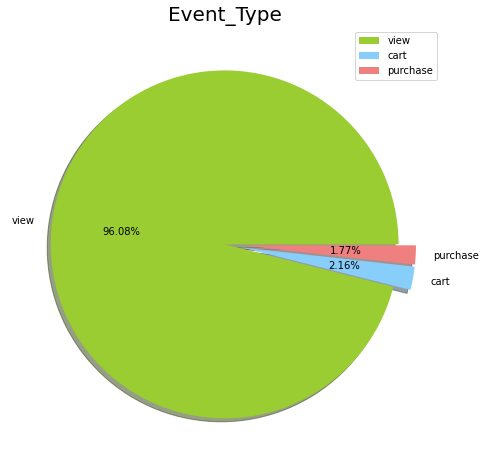

In [ ]:
labels = ['view', 'cart','purchase']
size = df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [94]:
#삼성 제품의 view cart purchase 현황을 확인해보자.

samsung=data[data['brand']=='samsung']
apple=data[data['brand']=='apple']
apple_df=apple.groupby(['event_time','event_type'],as_index=False).size()
samsung_df=samsung.groupby(['event_time','event_type'],as_index=False).size()

samsung_df,apple_df


(    event_time event_type  size
 0            1       cart   291
 1            1   purchase   211
 2            1       view  6652
 3            2       cart   313
 4            2   purchase   206
 ..         ...        ...   ...
 88          30   purchase   205
 89          30       view  6530
 90          31       cart   320
 91          31   purchase   260
 92          31       view  6652
 
 [93 rows x 3 columns],
     event_time event_type  size
 0            1       cart   215
 1            1   purchase   216
 2            1       view  5952
 3            2       cart   215
 4            2   purchase   189
 ..         ...        ...   ...
 88          30   purchase   219
 89          30       view  5168
 90          31       cart   260
 91          31   purchase   196
 92          31       view  5329
 
 [93 rows x 3 columns])

In [95]:
samsung_cart=samsung_df[samsung_df['event_type']=='cart']['size'].tolist()
samsung_view=samsung_df[samsung_df['event_type']=='view']['size'].tolist()
samsung_purchase=samsung_df[samsung_df['event_type']=='purchase']['size'].tolist()

apple_cart=apple_df[apple_df['event_type']=='cart']['size'].tolist()
apple_view=apple_df[apple_df['event_type']=='view']['size'].tolist()
apple_purchase=apple_df[apple_df['event_type']=='purchase']['size'].tolist()



In [98]:
samsung_chart=pd.DataFrame({'samsung_cart':samsung_cart,'samsung_view':samsung_view,'samsung_purchase':samsung_purchase})
apple_chart=pd.DataFrame({'apple_cart':apple_cart,'apple_view':apple_view,'apple_purchase':apple_purchase})
samsung_chart.index=samsung_chart.index+1


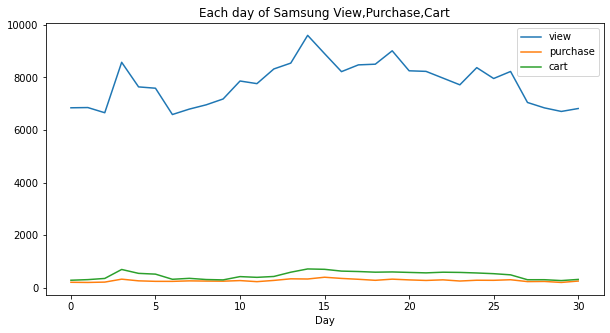

In [ ]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot()

ax.plot(samsung_chart.index,samsung_chart['samsung_view'],label='view')
ax.plot(samsung_chart.index,samsung_chart['samsung_purchase'],label='purchase')
ax.plot(samsung_chart.index,samsung_chart['samsung_cart'],label='cart')

plt.title('Each day of Samsung View,Purchase,Cart')
plt.xlabel('Day')
plt.legend(loc='best', ncol=1) 

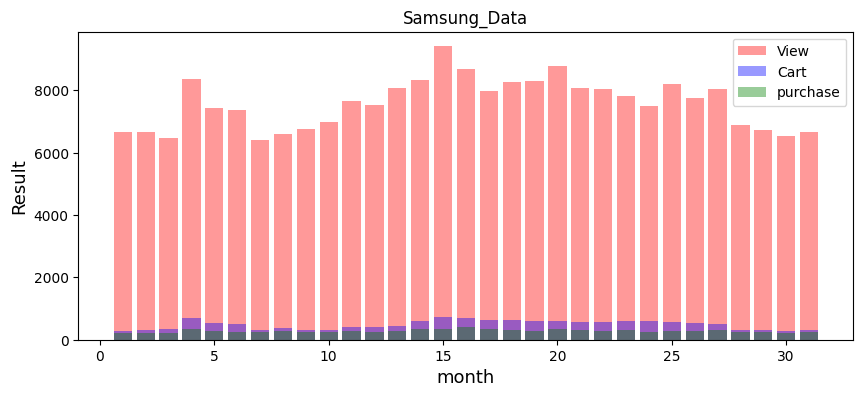

In [112]:
fig, ax = plt.subplots(figsize=(10,4))
b1 = plt.bar(samsung_chart.index, samsung_chart['samsung_view'], alpha=0.4, color='red', label='View')
b2 = plt.bar(samsung_chart.index, samsung_chart['samsung_cart'], alpha=0.4, color='blue', label='Cart')
b3 = plt.bar(samsung_chart.index, samsung_chart['samsung_purchase'], alpha=0.4, color='green', label='purchase')


# x축, y축 이름 및 범례 설정
plt.xlabel('month', size = 13)
plt.ylabel('Result', size = 13)
plt.title('Samsung_Data')
plt.legend()
plt.show()

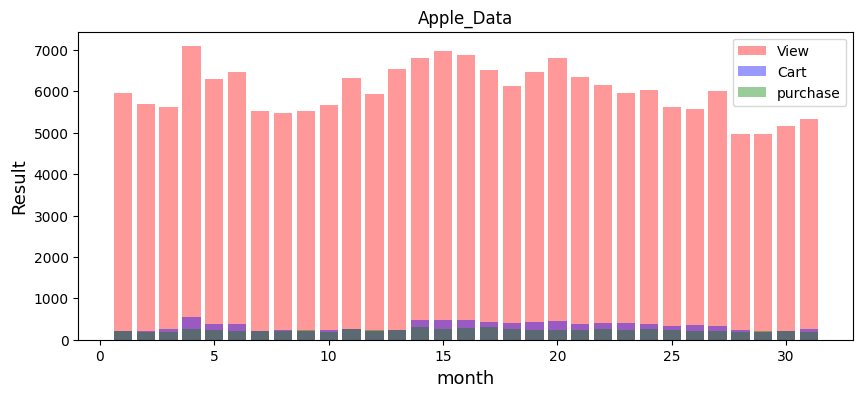

In [110]:
fig, ax = plt.subplots(figsize=(10,4))
b1 = plt.bar(apple_chart.index+1, apple_chart['apple_view'], alpha=0.4, color='red', label='View')
b2 = plt.bar(apple_chart.index+1, apple_chart['apple_cart'], alpha=0.4, color='blue', label='Cart')
b3 = plt.bar(apple_chart.index+1, apple_chart['apple_purchase'], alpha=0.4, color='green', label='purchase')

# x축, y축 이름 및 범례 설정
plt.xlabel('month', size = 13)
plt.ylabel('Result', size = 13)
plt.title('Apple_Data')
plt.legend()
plt.show()

In [ ]:
#일별 구매율 구하기 df_chart를 이용하자 일별방문자수는 위에서한듯
#방문자수 대비 구매율과, view 수 대비 구매율을 보여주자,
visitor_count=visitor_by_date['count'].tolist()

'''
df_chart=pd.DataFrame({'cart':cart,'purchase':purchase,'view':view})
df_chart.index=df_chart.index+1
df_chart
'''
df_chart['visitor_count']=(visitor_count)
df_chart

,cart,purchase,view,visitor_count
1,719,775,37364,43370
2,740,707,35968,41529
3,867,706,34477,38891
4,1976,1010,43080,48939
5,1505,918,39400,45597
6,1429,815,39717,45323
7,771,819,35533,42177
8,858,826,37356,48896
9,785,795,37655,47446
10,791,786,37168,45196


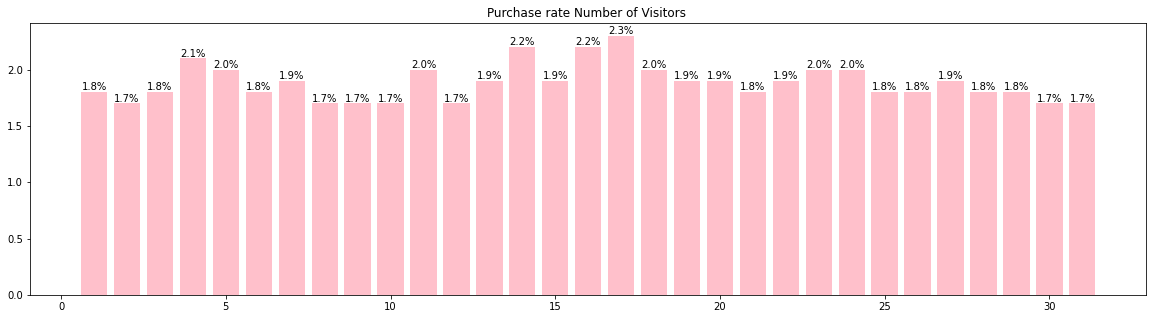

In [ ]:
#방문자수 대비 구매율
plt.subplots(figsize=(20,5))
x=df_chart.index
y=round((df_chart['purchase']/df_chart['visitor_count'])*100,1)
bar = plt.bar(x, y, color = 'pink')
plt.title('Purchase rate Number of Visitors ')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0 , height, '%.1f' % height+'%', ha='center', va='bottom', size = 10)



plt.show()

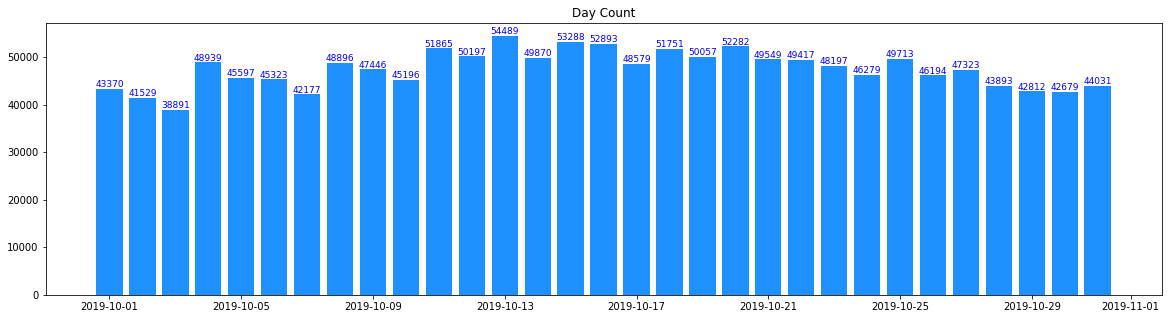

In [ ]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,5)



plt.bar(x,y ,color='dodgerblue')
plt.title('Day Count')
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

plt.show()

In [ ]:
'''
Action plan 1. 경하님께서 언급하신 컴퓨터 교체를 5년 주기로 가정한다면 이번달에 컴퓨터를 구매한 사람에게는 컴퓨터 관련 제품들은 보여주지 않는 방향으로  
→ 하지만 혹시 컴퓨터를 구매한 사람이 또 컴퓨터를 보거나 관심이 있는지는 파악해보자.
혹시 컴퓨터를 또 사는 사람이 있다면 

카테고리를 나누고 소분류로 컴퓨터라는 항목까지 찾은 후 
컴퓨터를 구매한 손님이 또 컴퓨터를 보거나 구매하는지 파악해보자. 

'''

''

In [ ]:
data=data.dropna()

In [ ]:
#카테고리 나누기 널값 제거해야함 
data['category_code_split']=data['category_code'].apply(lambda x : x.split('.'))
data

/var/folders/z3/56kysp1d32z1yg2cpszy0h1h0000gn/T/ipykernel_1319/3340773869.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_split
0,14726418,12,view,21407109,2053013561579406073,electronics.clocks,tissot,226.52,512636824,f45930d0-1807-40a9-815b-e2901d88e87e,"[electronics, clocks]"
1,13097134,11,view,1005169,2053013555631882655,electronics.smartphone,samsung,228.71,554770926,baa8b4b4-74f9-4ed8-a1a4-f9e9ff322a3a,"[electronics, smartphone]"
2,21014814,16,view,8800048,2053013555573162395,electronics.telephone,nokia,22.19,517857376,84cce548-1021-4286-9a8d-86638d664199,"[electronics, telephone]"
5,22447288,17,view,1004227,2053013555631882655,electronics.smartphone,apple,1003.84,513862246,2cf79802-71df-483b-9d9c-96dd8939957c,"[electronics, smartphone]"
6,9979914,8,view,4700671,2053013560899928785,auto.accessories.videoregister,xiaomi,48.39,514762265,984d40e4-578e-4459-9f6b-949103f6c628,"[auto, accessories, videoregister]"
...,...,...,...,...,...,...,...,...,...,...,...
2122428,7635659,7,view,17800028,2053013559868129947,computers.desktop,dxracer,282.09,543808582,296afd2b-40c0-445c-b478-8d640faf629b,"[computers, desktop]"
2122430,35668184,26,view,21407594,2053013561579406073,electronics.clocks,certina,278.00,517470882,b2957414-de14-44fb-b5c0-c3609b0e7ede,"[electronics, clocks]"
2122431,667814,1,view,1005104,2053013555631882655,electronics.smartphone,apple,975.57,555634406,41d6bf67-a286-4fc5-a2f0-cb682f2d5427,"[electronics, smartphone]"
2122432,14546305,12,view,1005105,2053013555631882655,electronics.smartphone,apple,1428.31,559365096,f08ae716-1262-409d-9c9f-31ce0ad1821c,"[electronics, smartphone]"


In [38]:
data['main_category'] = [x[0] for x in data['category_code_split']]
data['middle_category'] = [x[1] for x in data['category_code_split']]
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_split,main_category,middle_category
0,12,view,21407109,2053013561579406073,electronics.clocks,tissot,226.52,512636824,f45930d0-1807-40a9-815b-e2901d88e87e,"[electronics, clocks]",electronics,clocks
1,11,view,1005169,2053013555631882655,electronics.smartphone,samsung,228.71,554770926,baa8b4b4-74f9-4ed8-a1a4-f9e9ff322a3a,"[electronics, smartphone]",electronics,smartphone
2,16,view,8800048,2053013555573162395,electronics.telephone,nokia,22.19,517857376,84cce548-1021-4286-9a8d-86638d664199,"[electronics, telephone]",electronics,telephone
5,17,view,1004227,2053013555631882655,electronics.smartphone,apple,1003.84,513862246,2cf79802-71df-483b-9d9c-96dd8939957c,"[electronics, smartphone]",electronics,smartphone
6,8,view,4700671,2053013560899928785,auto.accessories.videoregister,xiaomi,48.39,514762265,984d40e4-578e-4459-9f6b-949103f6c628,"[auto, accessories, videoregister]",auto,accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
2122428,7,view,17800028,2053013559868129947,computers.desktop,dxracer,282.09,543808582,296afd2b-40c0-445c-b478-8d640faf629b,"[computers, desktop]",computers,desktop
2122430,26,view,21407594,2053013561579406073,electronics.clocks,certina,278.00,517470882,b2957414-de14-44fb-b5c0-c3609b0e7ede,"[electronics, clocks]",electronics,clocks
2122431,1,view,1005104,2053013555631882655,electronics.smartphone,apple,975.57,555634406,41d6bf67-a286-4fc5-a2f0-cb682f2d5427,"[electronics, smartphone]",electronics,smartphone
2122432,12,view,1005105,2053013555631882655,electronics.smartphone,apple,1428.31,559365096,f08ae716-1262-409d-9c9f-31ce0ad1821c,"[electronics, smartphone]",electronics,smartphone


In [47]:
#컴퓨터를 구매한 사람의 숫자.
computer_purchase=data.loc[(data['main_category']=='computers') & (data['event_type']=='purchase')]
computer_purchase.count()

event_time             1378
event_type             1378
product_id             1378
category_id            1378
category_code          1378
brand                  1378
price                  1378
user_id                1378
user_session           1378
category_code_split    1378
main_category          1378
middle_category        1378
dtype: int64

In [82]:
computer_duplicate=computer_purchase.loc[computer_purchase['product_id'].duplicated()]
computer_duplicate.count()


event_time             802
event_type             802
product_id             802
category_id            802
category_code          802
brand                  802
price                  802
user_id                802
user_session           802
category_code_split    802
main_category          802
middle_category        802
dtype: int64

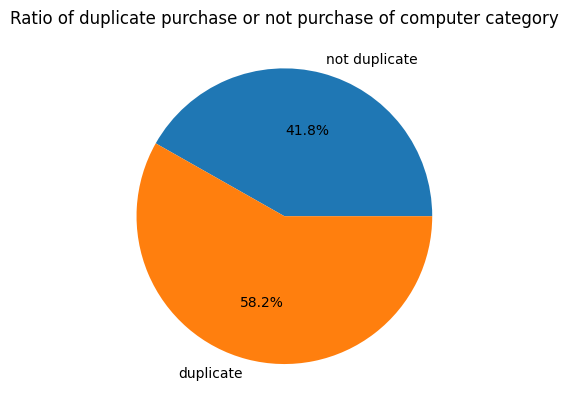

In [90]:
# 컴퓨터 카테고리에서 금번달 또 컴퓨터 카테고리를 구매한 사람 비율
import matplotlib.pyplot as plt

ratio=[576,802]
labels=['not duplicate','duplicate']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('Ratio of duplicate purchase or not purchase of computer category')
plt.show()



In [113]:
computer_duplicate

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_split,main_category,middle_category
12324,27,purchase,1307310,2053013558920217191,computers.notebook,acer,283.10,547802915,3b91e065-6c35-4eef-b4e2-ad44ca62a7f3,"[computers, notebook]",computers,notebook
28450,15,purchase,1306650,2053013558920217191,computers.notebook,acer,411.08,512396283,0422dce8-600f-4b9a-80d9-1b60f92845f6,"[computers, notebook]",computers,notebook
35952,4,purchase,1307067,2053013558920217191,computers.notebook,lenovo,252.23,523597438,844d2174-35a4-4249-ae8d-a6a3e8b8c21c,"[computers, notebook]",computers,notebook
36180,15,purchase,1480163,2053013561092866779,computers.desktop,acer,617.00,523156746,dba9a0cb-36bb-43ef-b534-6e5e993af5b1,"[computers, desktop]",computers,desktop
36798,28,purchase,1307310,2053013558920217191,computers.notebook,acer,283.10,543509628,33997e8c-a5c0-4694-bde3-cafac0330744,"[computers, notebook]",computers,notebook
...,...,...,...,...,...,...,...,...,...,...,...,...
2107240,23,purchase,1307342,2053013558920217191,computers.notebook,acer,823.68,535856057,0bed403d-314f-43ab-8557-7b745519ebb7,"[computers, notebook]",computers,notebook
2108986,13,purchase,1306659,2053013558920217191,computers.notebook,hp,321.73,541857804,c8e1b78c-ae7a-4fc1-9ea5-c1ca10fee6d4,"[computers, notebook]",computers,notebook
2109239,16,purchase,1306650,2053013558920217191,computers.notebook,acer,437.57,544689206,33870f15-7a6a-470d-a5fd-3c193432a86e,"[computers, notebook]",computers,notebook
2115658,9,purchase,5200128,2053013553316626707,computers.ebooks,pocketbook,254.58,528131141,446a0c53-a0d3-411e-a5ba-b0429b004c85,"[computers, ebooks]",computers,ebooks


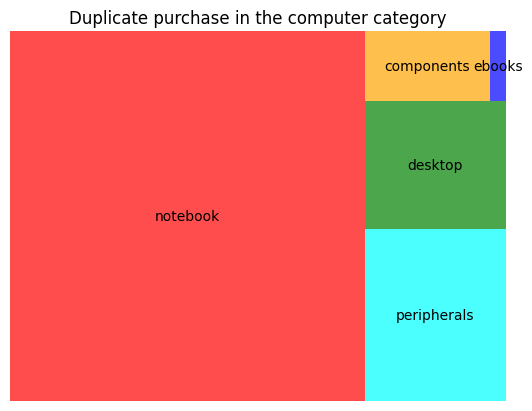

In [116]:
import squarify


#컴퓨터 카테고리를 산 사람들이 또 어떤 카테고리의 물건을 사는지 시각화 해보자.

n =7
com_dup =computer_duplicate['middle_category'].value_counts()[:n].sort_values(ascending=False)

plt.style.use('default')
plt.rcParams['font.size'] = 10



squarify.plot(com_dup,label=com_dup.index.array,color=["red","cyan","green","orange","blue","grey"], alpha=.7 )
plt.axis('off')
plt.title('Duplicate purchase in the computer category')
plt.show()


In [125]:
data.loc[data['brand']=='lg']


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_split,main_category,middle_category
124,21,view,3601427,2053013563810775923,appliances.kitchen.washer,lg,336.95,519048342,1e9c1c3a-50c2-4402-a66d-4e90d620eef0,"[appliances, kitchen, washer]",appliances,kitchen
199,1,view,2702339,2053013563911439225,appliances.kitchen.refrigerators,lg,573.81,534115518,d0b64146-9cf3-4573-8606-2c641346250f,"[appliances, kitchen, refrigerators]",appliances,kitchen
241,4,view,3700039,2053013565983425517,appliances.environment.vacuum,lg,183.43,556573943,679b9ae3-e3b7-49ca-92a1-2913d6fd724d,"[appliances, environment, vacuum]",appliances,environment
277,30,view,1802005,2053013554415534427,electronics.video.tv,lg,437.20,512968871,c3b3cdb8-6ee6-4ccd-aa38-8483ebeb1e27,"[electronics, video, tv]",electronics,video
317,30,view,3601485,2053013563810775923,appliances.kitchen.washer,lg,329.98,555525800,2949d78b-4f53-40b2-a98e-2a4511c18180,"[appliances, kitchen, washer]",appliances,kitchen
...,...,...,...,...,...,...,...,...,...,...,...,...
2121919,18,view,3601485,2053013563810775923,appliances.kitchen.washer,lg,297.73,560344931,84464397-685e-424e-961d-9fe65e58ff7e,"[appliances, kitchen, washer]",appliances,kitchen
2122095,8,view,2702277,2053013563911439225,appliances.kitchen.refrigerators,lg,463.31,519698828,1ba0dd51-260e-4303-9c47-45832a66fd34,"[appliances, kitchen, refrigerators]",appliances,kitchen
2122156,14,view,1801961,2053013554415534427,electronics.video.tv,lg,1801.57,548420635,7d572526-dbb7-4f5e-9eca-17044d352964,"[electronics, video, tv]",electronics,video
2122157,24,view,1802037,2053013554415534427,electronics.video.tv,lg,300.75,561848315,b20a49ca-b170-441e-bfc9-8baabc07627e,"[electronics, video, tv]",electronics,video


In [129]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [130]:
# 연관규칙 추천 아록리즘 모델 구현 

In [134]:
data.dtypes

event_time               int64
event_type              object
product_id               int64
category_id              int64
category_code           object
brand                   object
price                  float64
user_id                  int64
user_session            object
category_code_split     object
main_category           object
middle_category         object
dtype: object

In [137]:
purchase_user=list(only_purchases['user_id'].unique())

monetary_df = pd.DataFrame() ## 구매금액 데이터 초기화
monetary_df['user_id'] = purchase_user

monetary_data=[]

In [138]:
from tqdm import tqdm
 
 
monetary_data = [] ## 구매금액을 담을 리스트
for i in tqdm(purchase_user,position=0,desc='Calculating amount of individual customer'):
    temp = only_purchases.query('user_id==@i') ## 해당 아이디의 고객데이터 추출
    amount = sum(temp['price']) ## 해당 고객 구매금액
    monetary_data.append(amount)
    
monetary_df['Monetary'] = monetary_data ## 구매금액 데이터 삽

Calculating amount of individual customer: 100%|██████████| 24731/24731 [00:26<00:00, 948.04it/s] 


In [139]:
monetary_df

,user_id,Monetary
0,523013344,89.84
1,514696726,263.07
2,521699061,109.00
3,513022404,369.37
4,556002836,15.19
...,...,...
24726,516634081,473.27
24727,513816727,514.50
24728,517548594,756.65
24729,555514716,121.24
